## Time series data for power plants

### 1. Import data (Jan 2007 - Oct 2017)

In [1]:
import pandas as pd

In [226]:
%%time
path_eia923 = './eia923/'
df_eia923_y2017 = pd.read_excel(path_eia923 + 'EIA923_Schedules_2_3_4_5_M_10_2017_20DEC2017.xlsx', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [2, 3], skiprows = [0, 1])

CPU times: user 31.7 s, sys: 189 ms, total: 31.9 s
Wall time: 32.2 s


In [227]:
%%time
#path_eia923 = './eia923/'
df_eia923_y2016 = pd.read_excel(path_eia923 + 'f923_2016/EIA923_Schedules_2_3_4_5_M_12_2016_Final_Revision.xlsx', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [2, 3], skiprows = [0, 1])

CPU times: user 42.1 s, sys: 373 ms, total: 42.5 s
Wall time: 43.1 s


In [228]:
%%time
df_eia923_y2015 = pd.read_excel(path_eia923 + 'f923_2015/EIA923_Schedules_2_3_4_5_M_12_2015_Final_Revision.xlsx', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [2, 3], skiprows = [0, 1])

CPU times: user 37.9 s, sys: 151 ms, total: 38.1 s
Wall time: 38.3 s


In [229]:
%%time
df_eia923_y2014 = pd.read_excel(path_eia923 + 'f923_2014/EIA923_Schedules_2_3_4_5_M_12_2014_Final_Revision.xlsx', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [2, 3], skiprows = [0, 1])

CPU times: user 38 s, sys: 72 ms, total: 38 s
Wall time: 38.1 s


In [230]:
%%time
df_eia923_y2013 = pd.read_excel(path_eia923 + 'f923_2013/EIA923_Schedules_2_3_4_5_2013_Final_Revision.xlsx', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [2, 3], skiprows = [0, 1])

CPU times: user 34.2 s, sys: 65.1 ms, total: 34.2 s
Wall time: 34.3 s


In [231]:
%%time
df_eia923_y2012 = pd.read_excel(path_eia923 + 'f923_2012/EIA923_Schedules_2_3_4_5_M_12_2012_Final_Revision.xlsx', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [2, 3], skiprows = [0, 1])

CPU times: user 34.1 s, sys: 106 ms, total: 34.2 s
Wall time: 34.4 s


In [232]:
%%time
df_eia923_y2011 = pd.read_excel(path_eia923 + 'f923_2011/EIA923_Schedules_2_3_4_5_2011_Final_Revision.xlsx', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [2, 3], skiprows = [0, 1])

CPU times: user 38.2 s, sys: 70.7 ms, total: 38.3 s
Wall time: 38.3 s


In [233]:
%%time
df_eia923_y2010 = pd.read_excel(path_eia923 + 'f923_2010/SCHEDULE 3A 5A 8A 8B 8C 8D 8E 8F 2010 on NOV 30 2011.xls', 
                   sheetname='Generator',
                   header = [4], skiprows = [0, 1, 2])

CPU times: user 3.37 s, sys: 27.6 ms, total: 3.4 s
Wall time: 3.41 s


In [234]:
%%time
df_eia923_y2009 = pd.read_excel(path_eia923 + 'f923_2009/SCHEDULE 3A 5A 8A 8B 8C 8D 8E 8F REVISED 2009 04112011.xls', 
                   sheetname='Generator',
                   header = [4], skiprows = [0, 1, 2])

CPU times: user 2.16 s, sys: 11.8 ms, total: 2.17 s
Wall time: 2.18 s


In [235]:
%%time
df_eia923_y2008 = pd.read_excel(path_eia923 + 'f923_2008/SCHEDULE 3A 5A 8A 8B 8C 8D 8E 8F 2008.xlsm', 
                   sheetname='Generator Data',
                   header = [4], skiprows = [0, 1, 2])

CPU times: user 7.39 s, sys: 21.5 ms, total: 7.41 s
Wall time: 7.41 s


In [236]:
%%time
df_eia923_y2007 = pd.read_excel(path_eia923 + 'f906920_2007/f906920_2007.xls', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [4], skiprows = [0, 1])

CPU times: user 4.12 s, sys: 20.8 ms, total: 4.15 s
Wall time: 4.16 s


### 2. Clean Data (month as columns)

In [237]:
def clean_by_year(raw_df, year_str, delim = '\n', state_col = 'Plant State'):
    # Set columns to be single level
    raw_df.columns = raw_df.columns.get_level_values(1)
    # Drop the rows that don't correspond to a specific operator
#    drop_row_ind = raw_df.loc[:, 'Operator Id'] == 99999
#    df = raw_df.loc[~drop_row_ind, :]
#     # select by State
#     state_row_ind = df.loc[:, state_col] == 'WA'
#     df = df.loc[state_row_ind, :]
    # select by Plant Id
    plant_row_ind = raw_df.loc[:, 'Plant Id'] == 3845
    df = raw_df.loc[plant_row_ind, :]
    # Use plant's & operator's id and name as row index
#     df = df.set_index(['Plant Id', 'Plant Name', 'Operator Id', 'Operator Name', state_col])
    df = df.set_index(['Plant Id'])
    # Select columns that contains generation
    col_ind = [i for i in df.columns if 'Netgen' in i]
    df = df.loc[:, col_ind]
    # Rename columns to append year
    col_new_name = [i.split(delim)[1][:3].upper() + '_' + year_str for i in df.columns]
    df.columns = col_new_name
    df.index.set_names('Plant Id', inplace = True)
#     df.index.set_names('Plant Id', level = 0, inplace = True)
#     df.index.set_names('Plant Name', level = 1, inplace = True)
#     df.index.set_names('Operator Id', level = 2, inplace = True)
#     df.index.set_names('Operator Name', level = 3, inplace = True)
#     df.index.set_names('Plant State', level = 4, inplace = True)
    
    return df#.sum(axis = 0)

In [238]:
df2017_new = clean_by_year(df_eia923_y2017, '2017')

In [239]:
df2017_new

,JAN_2017,FEB_2017,MAR_2017,APR_2017,MAY_2017,JUN_2017,JUL_2017,AUG_2017,SEP_2017,OCT_2017,NOV_2017,DEC_2017
Plant Id,,,,,,,,,,,,
3845,2827.45,72.118,0,0,0,0,3468.2,94.953,0,1794.09,.,.
3845,493133,313283,0,0,0,0,468454,0,0,0,.,.
3845,0,0,0,0,0,0,0,868769,842645,738706,.,.
3845,2952.39,222.626,0,0,0,0,15050.7,19295.4,18062.7,19688.8,.,.


In [240]:
df2016_new = clean_by_year(df_eia923_y2016, '2016')

In [241]:
df2016_new

,JAN_2016,FEB_2016,MAR_2016,APR_2016,MAY_2016,JUN_2016,JUL_2016,AUG_2016,SEP_2016,OCT_2016,NOV_2016,DEC_2016
Plant Id,,,,,,,,,,,,
3845,89.086,0,0,0,0,3085.49,1322.16,1043.68,561.745,745.226,157.369,1103.13
3845,358114,0,0,0,0,170867,607278,793183,782188,651691,439908,710607
3845,0,0,0,0,0,0,0,0,0,0,0,0
3845,13930.8,0,0,0,0,4067.94,8183.44,16869.3,6270.56,3496.59,31.144,2040.96


In [242]:
df2015_new = clean_by_year(df_eia923_y2015, '2015')

In [243]:
df2015_new

,JAN_2015,FEB_2015,MAR_2015,APR_2015,MAY_2015,JUN_2015,JUL_2015,AUG_2015,SEP_2015,OCT_2015,NOV_2015,DEC_2015
Plant Id,,,,,,,,,,,,
3845,36.505,40.041,0,0,1274.17,1508.17,73.273,324.576,266.048,184.169,1305.06,2417.26
3845,536358,27.959,0,0,155947,527311,635328,580570,594231,633061,486072,697130
3845,18059.8,0,.,0,9738.02,21786.5,22568,24481.8,18389.3,17426.2,17775.2,19688.4


In [244]:
df2014_new = clean_by_year(df_eia923_y2014, '2014')

In [245]:
df2014_new.head()

,JAN_2014,FEB_2014,MAR_2014,APR_2014,MAY_2014,JUN_2014,JUL_2014,AUG_2014,SEP_2014,OCT_2014,NOV_2014,DEC_2014
Plant Id,,,,,,,,,,,,
3845,0,0,0,0,.,.,.,.,.,.,.,.
3845,581.251,292.961,988.38,124.295,0,1861.99,791.855,1241.81,36.755,203.475,761.928,999.907
3845,943694,867353,302985,187618,0,180492,748714,758546,744725,691272,696626,553742
3845,.,.,.,.,.,.,.,.,.,.,.,0


In [246]:
df2013_new = clean_by_year(df_eia923_y2013, '2013', delim = '_', state_col = 'State')

In [247]:
df2013_new.head()

,JAN_2013,FEB_2013,MAR_2013,APR_2013,MAY_2013,JUN_2013,JUL_2013,AUG_2013,SEP_2013,OCT_2013,NOV_2013,DEC_2013
Plant Id,,,,,,,,,,,,
3845,0,0,0,0,0,0,0,0,0,0,0,0
3845,0,0,0,0,.,.,.,.,.,.,.,.
3845,1055,1050.43,661.22,94.576,0,1880.45,1209.31,0,258.403,293.792,841.986,351.078
3845,448826,378644,848121,22561.4,0,107175,720055,882869,817036,907165,733294,837970


In [248]:
df2012_new = clean_by_year(df_eia923_y2012, '2012')

In [249]:
df2012_new.head()

,JAN_2012,FEB_2012,MAR_2012,APR_2012,MAY_2012,JUN_2012,JUL_2012,AUG_2012,SEP_2012,OCT_2012,NOV_2012,DEC_2012
Plant Id,,,,,,,,,,,,
3845,0,0,0,0,0,0,0,0,0,0,0,0
3845,0,0,0,0,0,0,0,0,0,0,0,0
3845,1228.34,0,0,0,0,0,0,2538.64,706.795,794.662,1252.93,773.016
3845,402365,0,0,0,0,0,0,551473,687617,740675,768586,577719


In [250]:
df2011_new = clean_by_year(df_eia923_y2011, '2011', '_', state_col = 'State')

In [251]:
df2011_new.head()

,JAN_2011,FEB_2011,MAR_2011,APR_2011,MAY_2011,JUN_2011,JUL_2011,AUG_2011,SEP_2011,OCT_2011,NOV_2011,DEC_2011
Plant Id,,,,,,,,,,,,
3845,0,0,0,0,0,0,0,0,0,0,0,0
3845,0,0,0,0,0,0,0,0,0,0,0,0
3845,851.395,1123.3,1477.07,0,0,0,2646.99,1809.96,214.004,74.825,25.406,903.027
3845,645878,53051.7,113592,0,0,0,56845,851257,928778,827328,814362,908882


In [252]:
def clean_by_year_after2011(raw_df, year_str, delim = ' ', search_col = 'Net Generation'):
#     # Set columns to be single level
#     raw_df.columns = raw_df.columns.get_level_values(1)
    # Drop the rows that don't correspond to a specific operator
#     drop_row_ind = raw_df.loc[:, 'Operator ID'] == 99999
#     df = raw_df.loc[~drop_row_ind, :]
    # Use plant's & operator's id and name as row index
#     df = df.set_index(['Plant ID', 'Plant Name', 'Operator ID', 'Operator Name', 'State'])
    plant_row_ind = raw_df.loc[:, 'Plant ID'] == 3845
    df = raw_df.loc[plant_row_ind, :]
    # Use plant's & operator's id and name as row index
#     df = df.set_index(['Plant Id', 'Plant Name', 'Operator Id', 'Operator Name', state_col])
    df = df.set_index(['Plant ID'])

    # Select columns that contains generation
    col_ind = [i for i in df.columns if search_col in i]
    df = df.loc[:, col_ind]
    # Rename columns to append year
    col_new_name = [i.split(delim)[-1][:3].upper() + '_' + year_str for i in df.columns]
    df.columns = col_new_name
#     df.index.set_names('Plant Id', level = 0, inplace = True)
#     df.index.set_names('Plant Name', level = 1, inplace = True)
#     df.index.set_names('Operator Id', level = 2, inplace = True)
#     df.index.set_names('Operator Name', level = 3, inplace = True)
#     df.index.set_names('Plant State', level = 4, inplace = True)
    df.index.set_names('Plant Id', inplace = True)
    return df

In [253]:
df2010_new = clean_by_year_after2011(df_eia923_y2010, '2010')

In [254]:
df2010_new.head()

,JAN_2010,FEB_2010,MAR_2010,APR_2010,MAY_2010,JUN_2010,JUL_2010,AUG_2010,SEP_2010,OCT_2010,NOV_2010,DEC_2010,DAT_2010
Plant Id,,,,,,,,,,,,,
3845,391095.0,342669.0,496825.0,242792.0,315808.0,67135.0,480804.0,476855.0,396303.0,290772.0,452485.0,496381.0,4449924.0
3845,437664.0,377919.0,435609.0,321721.0,0.0,0.0,374370.0,479711.0,418438.0,324093.0,442132.0,436901.0,4048558.0
3845,0.0,0.0,2316.0,6832.0,0.0,0.0,12909.0,0.0,0.0,3272.0,84.0,188.0,25601.0


In [255]:
df2009_new = clean_by_year_after2011(df_eia923_y2009, '2009')

In [256]:
df2009_new.head()

,JAN_2009,FEB_2009,MAR_2009,APR_2009,MAY_2009,JUN_2009,JUL_2009,AUG_2009,SEP_2009,OCT_2009,NOV_2009,DEC_2009,DAT_2009
Plant Id,,,,,,,,,,,,,
3845,491468.0,394057.0,460694.0,159463.0,0.0,0.0,317358.0,346535.0,285005.0,446167.0,92189.0,457691.0,3450627.0
3845,443164.0,437881.0,406140.0,226213.0,0.0,9278.0,450002.0,395840.0,454294.0,480034.0,297900.0,398634.0,3999380.0
3845,649.0,0.0,1586.0,0.0,0.0,0.0,68227.0,26470.0,21913.0,3330.0,0.0,2576.0,124751.0


In [257]:
df2008_new = clean_by_year_after2011(df_eia923_y2008, '2008')

In [258]:
df2008_new.head()

,JAN_2008,FEB_2008,MAR_2008,APR_2008,MAY_2008,JUN_2008,JUL_2008,AUG_2008,SEP_2008,OCT_2008,NOV_2008,DEC_2008,DAT_2008
Plant Id,,,,,,,,,,,,,
3845,342785.0,390321.0,435050.0,481267.0,327639.0,99209.0,342446.0,452405.0,443163.0,503980.0,429405.0,473264.0,4720934.0
3845,448316.0,441275.0,412644.0,47680.0,0.0,20135.0,408353.0,291295.0,495491.0,511765.0,444134.0,495062.0,4016150.0
3845,10969.0,4074.0,0.0,11128.0,0.0,0.0,2857.0,18114.0,13116.0,850.0,0.0,0.0,61108.0


In [259]:
df2007_new = clean_by_year_after2011(df_eia923_y2007, '2007', delim = '_', search_col = 'NETGEN')

In [260]:
df2007_new.head()

,JAN_2007,FEB_2007,MAR_2007,APR_2007,MAY_2007,JUN_2007,JUL_2007,AUG_2007,SEP_2007,OCT_2007,NOV_2007,DEC_2007
Plant Id,,,,,,,,,,,,
3845,0.000,0.000,0.000,0.000,967.000,241.000,11896.000,24913.000,28926.000,4521.000,2586.000,5407.000
3845,0.000,0.000,0.000,0.000,4141.000,1490.000,42872.000,84210.000,94007.000,18361.000,9262.000,20085.000
3845,214.702,164.444,999.059,1000.973,663.792,2661.526,1524.111,25.954,6.428,479.137,903.081,830.285
3845,718025.298,627087.556,452356.941,612410.027,457144.208,616082.474,838311.889,895625.046,798467.572,781342.863,803226.919,917729.715


### 5. Combine into Time Series

In [290]:
ts2007 = df2007_new.apply(lambda x: x.sum(axis = 0))

In [291]:
ts2007

JAN_2007     718240.0
FEB_2007     627252.0
MAR_2007     453356.0
APR_2007     613411.0
MAY_2007     462916.0
JUN_2007     620475.0
JUL_2007     894604.0
AUG_2007    1004774.0
SEP_2007     921407.0
OCT_2007     804704.0
NOV_2007     815978.0
DEC_2007     944052.0
dtype: float64

In [292]:
ts2008 = df2008_new.sum(axis = 0).fillna(0.)

In [293]:
ts2008

JAN_2008     802070.0
FEB_2008     835670.0
MAR_2008     847694.0
APR_2008     540075.0
MAY_2008     327639.0
JUN_2008     119344.0
JUL_2008     753656.0
AUG_2008     761814.0
SEP_2008     951770.0
OCT_2008    1016595.0
NOV_2008     873539.0
DEC_2008     968326.0
DAT_2008    8798192.0
dtype: float64

In [294]:
ts2008.drop('DAT_2008', inplace = True)

In [295]:
ts2009 = df2009_new.sum(axis = 0)

In [296]:
ts2009

JAN_2009     935281.0
FEB_2009     831938.0
MAR_2009     868420.0
APR_2009     385676.0
MAY_2009          0.0
JUN_2009       9278.0
JUL_2009     835587.0
AUG_2009     768845.0
SEP_2009     761212.0
OCT_2009     929531.0
NOV_2009     390089.0
DEC_2009     858901.0
DAT_2009    7574758.0
dtype: float64

In [297]:
ts2009.drop('DAT_2009', inplace = True)

In [298]:
ts2010 = df2010_new.sum(axis = 0)

In [299]:
ts2010

JAN_2010     828759.0
FEB_2010     720588.0
MAR_2010     934750.0
APR_2010     571345.0
MAY_2010     315808.0
JUN_2010      67135.0
JUL_2010     868083.0
AUG_2010     956566.0
SEP_2010     814741.0
OCT_2010     618137.0
NOV_2010     894701.0
DEC_2010     933470.0
DAT_2010    8524083.0
dtype: float64

In [300]:
ts2010.drop('DAT_2010', inplace = True)

In [301]:
ts2011 = df2011_new.sum(axis = 0)

In [302]:
ts2011.shape

(12,)

In [303]:
ts2012 = df2012_new.sum(axis = 0)

In [304]:
ts2012.shape

(12,)

In [308]:
df2013_new[df2013_new == '.'] = 0.

In [309]:
ts2013 = df2013_new.sum(axis = 0)

In [310]:
ts2013.shape

(12,)

In [311]:
df2014_new[df2014_new == '.'] = 0.

In [312]:
ts2014 = df2014_new.sum(axis = 0)

In [314]:
ts2014.shape

(12,)

In [315]:
df2015_new[df2015_new == '.'] = 0.

In [316]:
ts2015 = df2015_new.sum(axis = 0)

In [317]:
ts2015.shape

(12,)

In [318]:
ts2016 = df2016_new.sum(axis = 0)

In [319]:
ts2016.shape

(12,)

In [320]:
ts2017 = df2017_new.sum(axis = 0)

In [321]:
ts2017[ts2017 == '....'] = 0.

In [322]:
ts2017.drop(['NOV_2017', 'DEC_2017'], inplace = True)

In [323]:
ts2017

JAN_2017    498913
FEB_2017    313578
MAR_2017         0
APR_2017         0
MAY_2017         0
JUN_2017         0
JUL_2017    486973
AUG_2017    888159
SEP_2017    860708
OCT_2017    760189
dtype: object

In [324]:
ts_test = pd.concat([ts2007, ts2008, ts2009, ts2010, ts2011, ts2012, ts2013, ts2014, ts2015, ts2016, ts2017], axis = 0)

In [325]:
df_ts = pd.DataFrame(ts_test, columns = ['net_gen'])

In [326]:
df_ts.reset_index(level=0, inplace=True)

In [327]:
df_ts.columns = ['date', 'net_gen']

In [328]:
pd.date_range(start = '2007-01-01', end = '2017-11-1', freq = 'M')

DatetimeIndex(['2007-01-31', '2007-02-28', '2007-03-31', '2007-04-30',
               '2007-05-31', '2007-06-30', '2007-07-31', '2007-08-31',
               '2007-09-30', '2007-10-31',
               ...
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31'],
              dtype='datetime64[ns]', length=130, freq='M')

In [329]:
df_ts.shape

(130, 2)

In [330]:
df_ts['time_stamp'] = pd.date_range(start = '2007-01-01', end = '2017-11-1', freq = 'M')

In [331]:
df_ts

,date,net_gen,time_stamp
0,JAN_2007,718240,2007-01-31
1,FEB_2007,627252,2007-02-28
2,MAR_2007,453356,2007-03-31
3,APR_2007,613411,2007-04-30
4,MAY_2007,462916,2007-05-31
5,JUN_2007,620475,2007-06-30
6,JUL_2007,894604,2007-07-31
7,AUG_2007,1.00477e+06,2007-08-31
8,SEP_2007,921407,2007-09-30
9,OCT_2007,804704,2007-10-31


In [332]:
df_input = df_ts.loc[:,['time_stamp', 'net_gen']]

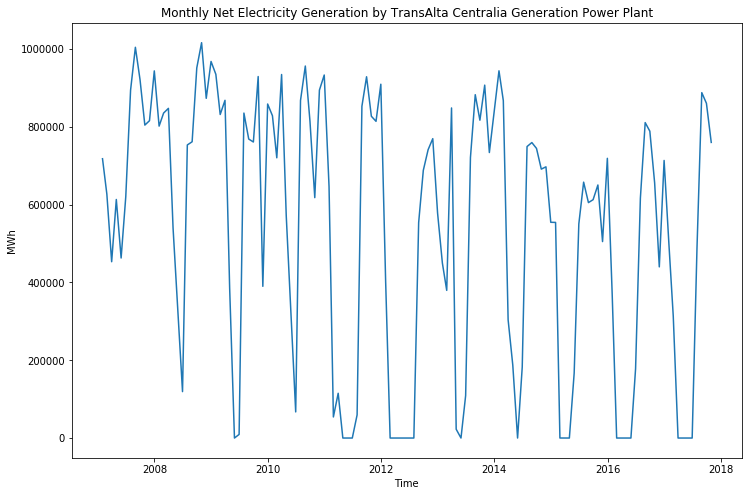

In [337]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(df_input.loc[:,'time_stamp'], df_input.loc[:, 'net_gen'])
ax.set_xlabel('Time');
ax.set_ylabel('MWh');
ax.set_title('Monthly Net Electricity Generation by TransAlta Centralia Generation Power Plant');

In [334]:
df_input.to_csv('plantid3845.csv', index = False)

In [335]:
test = pd.read_csv('plantid3845.csv')

In [336]:
test

,time_stamp,net_gen
0,2007-01-31,718240.000
1,2007-02-28,627252.000
2,2007-03-31,453356.000
3,2007-04-30,613411.000
4,2007-05-31,462916.000
5,2007-06-30,620475.000
6,2007-07-31,894604.000
7,2007-08-31,1004774.000
8,2007-09-30,921407.000
9,2007-10-31,804704.000


### 3. Group by Plant Id, Operator Id

In [93]:
def unique_by_state(raw_df):
    df = raw_df.iloc[raw_df.index.get_level_values('Plant State') == 'WA',:]
    df.groupby(level = 0).sum()
    return df

In [100]:
df2017_unique = unique_by_state(df2017_new)
df2017_unique.shape

(69, 12)

In [101]:
df2016_unique = unique_by_state(df2016_new)
df2016_unique.shape

(199, 12)

In [80]:
df2015_unique = unique_by_state(df2015_new)
df2015_unique.shape

(192, 12)

In [81]:
df2014_unique = unique_by_state(df2014_new)
df2014_unique.shape

(197, 12)

In [82]:
df2013_unique = unique_by_state(df2013_new)
df2013_unique.shape

(194, 12)

In [83]:
df2012_unique = unique_by_state(df2012_new)
df2012_unique.shape

(185, 12)

In [84]:
df2011_unique = unique_by_state(df2011_new)
df2011_unique.shape

(183, 12)

In [85]:
df2010_unique = unique_by_state(df2010_new)
df2010_unique.shape

(33, 13)

In [86]:
df2009_unique = unique_by_state(df2009_new)
df2009_unique.shape

(31, 13)

In [87]:
df2008_unique = unique_by_state(df2008_new)
df2008_unique.shape

(27, 13)

In [88]:
df2007_unique = unique_by_state(df2007_new)
df2007_unique.shape

(158, 12)

### 4. Create Multi-index from unique Plant Id & Operator Id

In [119]:
plantid_set = set(df2017_unique.index.get_level_values('Plant Id').unique())

In [120]:
plantid_set = plantid_set.intersection(set(df2016_unique.index.get_level_values('Plant Id').unique()))

In [121]:
plantid_set = plantid_set.intersection(set(df2015_unique.index.get_level_values('Plant Id').unique()))

In [122]:
plantid_set = plantid_set.intersection(set(df2014_unique.index.get_level_values('Plant Id').unique()))

In [ ]:
plantid_set = plantid_set.intersection(set(df2013_unique.index.get_level_values('Plant Id').unique()))

In [126]:
plantid_set = plantid_set.intersection(set(df2012_unique.index.get_level_values('Plant Id').unique()))

In [128]:
plantid_set = plantid_set.intersection(set(df2011_unique.index.get_level_values('Plant Id').unique()))

In [130]:
plantid_set = plantid_set.intersection(set(df2010_unique.index.get_level_values('Plant Id').unique()))

In [132]:
plantid_set = plantid_set.intersection(set(df2009_unique.index.get_level_values('Plant Id').unique()))

In [134]:
plantid_set = plantid_set.intersection(set(df2008_unique.index.get_level_values('Plant Id').unique()))

In [136]:
plantid_set = plantid_set.intersection(set(df2007_unique.index.get_level_values('Plant Id').unique()))

In [137]:
len(plantid_set)

5

In [138]:
plantid_set

{3845, 50187, 50886, 54268, 54537}

In [147]:
df2017_unique.loc[df2017_unique.index.get_level_values('Plant Id') == 3845, :]

JAN_2017  \
Plant Id Plant Name                     Operator Id Operator Name               Plant State            
3845     Transalta Centralia Generation 19099       TransAlta Centralia Gen LLC WA           2827.45   
                                                                                WA            493133   
                                                                                WA                 0   
                                                                                WA           2952.39   

                                                                                            FEB_2017  \
Plant Id Plant Name                     Operator Id Operator Name               Plant State            
3845     Transalta Centralia Generation 19099       TransAlta Centralia Gen LLC WA            72.118   
                                                                                WA            313283   
                                                                                WA                 0   
                                                                                WA           222.626   

                                                                                            MAR_2017  \
Plant Id Plant Name                     Operator Id Operator Name               Plant State            
3845     Transalta Centralia Generation 19099       TransAlta Centralia Gen LLC WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   

                                                                                            APR_2017  \
Plant Id Plant Name                     Operator Id Operator Name               Plant State            
3845     Transalta Centralia Generation 19099       TransAlta Centralia Gen LLC WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   

                                                                                            MAY_2017  \
Plant Id Plant Name                     Operator Id Operator Name               Plant State            
3845     Transalta Centralia Generation 19099       TransAlta Centralia Gen LLC WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   

                                                                                            JUN_2017  \
Plant Id Plant Name                     Operator Id Operator Name               Plant State            
3845     Transalta Centralia Generation 19099       TransAlta Centralia Gen LLC WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   

                                                                                            JUL_2017  \
Plant Id Plant Name                     Operator Id Operator Name               Plant State            
3845     Transalta Centralia Generation 19099       TransAlta Centralia Gen LLC WA            3468.2   
                              

In [148]:
df2017_unique.loc[df2017_unique.index.get_level_values('Plant Id') == 50187, :]

JAN_2017  \
Plant Id Plant Name                            Operator Id Operator Name                 Plant State            
50187    Nippon Dynawave Packaging Longview WA 60561       Nippon Dynawave Packaging Co. WA           14139.9   
                                                                                         WA             3.694   
                                                                                         WA           5407.91   
                                                                                         WA           122.018   
                                                                                         WA           1512.64   
                                                                                         WA           2826.57   
                                                                                         WA           6003.62   

                                                                                                     FEB_2017  \
Plant Id Plant Name                            Operator Id Operator Name                 Plant State            
50187    Nippon Dynawave Packaging Longview WA 60561       Nippon Dynawave Packaging Co. WA           12915.7   
                                                                                         WA            45.057   
                                                                                         WA           4349.62   
                                                                                         WA             4.169   
                                                                                         WA           1034.12   
                                                                                         WA           3053.61   
                                                                                         WA           3530.05   

                                                                                                     MAR_2017  \
Plant Id Plant Name                            Operator Id Operator Name                 Plant State            
50187    Nippon Dynawave Packaging Longview WA 60561       Nippon Dynawave Packaging Co. WA           12275.7   
                                                                                         WA            21.548   
                                                                                         WA           3142.39   
                                                                                         WA             9.703   
                                                                                         WA           937.881   
                                                                                         WA           447.917   
                                                                                         WA           4131.78   

                                                                                                     APR_2017  \
Plant Id Plant Name                            Operator Id Operator Name                 Plant State            
50187    Nippon Dynawave Packaging Longview WA 60561       Nippon Dynawave Packaging Co. WA           6836.34   
                                                                                         WA             7.651   
                                                                                         WA           2181.99   
                                                                                         WA           313.793   
                                                                                         WA            578.79   
                                                                                         WA           2782.29   
                                                                                         WA           1857.42   

                             

In [149]:
df2017_unique.loc[df2017_unique.index.get_level_values('Plant Id') == 50886, :]

JAN_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           3798.06   
                                                             WA           3648.94   

                                                                         FEB_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           3008.49   
                                                             WA           2890.51   

                                                                         MAR_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           5821.66   
                                                             WA           5593.34   

                                                                         APR_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           6204.89   
                                                             WA           5962.11   

                                                                         MAY_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           6075.93   
                                                             WA           5837.07   

                                                                         JUN_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           655.333   
                                                             WA           629.667   

                                                                         JUL_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           5945.29   
                                                             WA           5712.71   

                                                                         AUG_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           5709.54   
                                                             WA           5485.46   

                                                                         SEP_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           5724.98   
                                                             WA           5500.02   

                                                                         OCT_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           6034.01   
                                                             WA           5796.99   

                                                                         NOV_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA                 .   
                                                             WA                 .   

                                                                         DEC_2017  
Plant Id Plant Name              Operator Id Operator Name   Plant State           
50886    Spokane Waste to Energy 42892       City of Spokane WA                 .  
                                                             WA       

In [150]:
df2017_unique.loc[df2017_unique.index.get_level_values('Plant Id') == 54268, :]

JAN_2017  \
Plant Id Plant Name               Operator Id Operator Name               Plant State            
54268    March Point Cogeneration 11459       March Point Cogeneration Co WA                 0   
                                                                          WA                 0   
                                                                          WA           57386.6   
                                                                          WA           36727.4   

                                                                                      FEB_2017  \
Plant Id Plant Name               Operator Id Operator Name               Plant State            
54268    March Point Cogeneration 11459       March Point Cogeneration Co WA                 0   
                                                                          WA                 0   
                                                                          WA           63111.1   
                                                                          WA           22439.9   

                                                                                      MAR_2017  \
Plant Id Plant Name               Operator Id Operator Name               Plant State            
54268    March Point Cogeneration 11459       March Point Cogeneration Co WA                 0   
                                                                          WA                 0   
                                                                          WA           59220.8   
                                                                          WA           23113.2   

                                                                                      APR_2017  \
Plant Id Plant Name               Operator Id Operator Name               Plant State            
54268    March Point Cogeneration 11459       March Point Cogeneration Co WA                 0   
                                                                          WA                 0   
                                                                          WA           46728.3   
                                                                          WA           21081.7   

                                                                                      MAY_2017  \
Plant Id Plant Name               Operator Id Operator Name               Plant State            
54268    March Point Cogeneration 11459       March Point Cogeneration Co WA                 0   
                                                                          WA                 0   
                                                                          WA           42749.9   
                                                                          WA           24995.1   

                                                                                      JUN_2017  \
Plant Id Plant Name               Operator Id Operator Name               Plant State            
54268    March Point Cogeneration 11459       March Point Cogeneration Co WA                 0   
                                                                          WA                 0   
                                                                          WA           39157.1   
                                                                          WA           31248.9   

                                                                                      JUL_2017  \
Plant Id Plant Name               Operator Id Operator Name               Plant State            
54268    March Point Cogeneration 11459       March Point Cogeneration Co WA                 0   
                                                                          WA                 0   
                                                                          WA           40610.1   
                                                              

In [151]:
df2017_unique.loc[df2017_unique.index.get_level_values('Plant Id') == 54537, :]

JAN_2017  \
Plant Id Plant Name                  Operator Id Operator Name          Plant State            
54537    Ferndale Generating Station 15500       Puget Sound Energy Inc WA             1.656   
                                                                        WA           24796.3   
                                                                        WA              3.65   
                                                                        WA           54644.3   

                                                                                    FEB_2017  \
Plant Id Plant Name                  Operator Id Operator Name          Plant State            
54537    Ferndale Generating Station 15500       Puget Sound Energy Inc WA             0.206   
                                                                        WA           15139.8   
                                                                        WA             0.453   
                                                                        WA           33385.5   

                                                                                    MAR_2017  \
Plant Id Plant Name                  Operator Id Operator Name          Plant State            
54537    Ferndale Generating Station 15500       Puget Sound Energy Inc WA                 0   
                                                                        WA             14319   
                                                                        WA                 0   
                                                                        WA             31184   

                                                                                    APR_2017  \
Plant Id Plant Name                  Operator Id Operator Name          Plant State            
54537    Ferndale Generating Station 15500       Puget Sound Energy Inc WA                 0   
                                                                        WA             26000   
                                                                        WA                 0   
                                                                        WA             54154   

                                                                                    MAY_2017  \
Plant Id Plant Name                  Operator Id Operator Name          Plant State            
54537    Ferndale Generating Station 15500       Puget Sound Energy Inc WA                 0   
                                                                        WA              2284   
                                                                        WA                 0   
                                                                        WA              4710   

                                                                                    JUN_2017  \
Plant Id Plant Name                  Operator Id Operator Name          Plant State            
54537    Ferndale Generating Station 15500       Puget Sound Energy Inc WA                 0   
                                                                        WA                 0   
                                                                        WA                 0   
                                                                        WA                 0   

                                                                                    JUL_2017  \
Plant Id Plant Name                  Operator Id Operator Name          Plant State            
54537    Ferndale Generating Station 15500       Puget Sound Energy Inc WA             7.895   
                                                                        WA           29477.1   
                                                                        WA            16.648   
                                                                        WA           62155.4   

                                             

In [153]:
df2016_unique.loc[df2016_unique.index.get_level_values('Plant Id') == 50329, :]

JAN_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1166.54   

                                                                                         FEB_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            1312.5   

                                                                                         MAR_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1460.47   

                                                                                         APR_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1458.45   

                                                                                         MAY_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1422.68   

                                                                                         JUN_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1029.13   

                                                                                         JUL_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            1328.6   

                                                                                         AUG_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1206.38   

                                                                                         SEP_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1219.04   

                                                                                         OCT_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            1400.4   

                                       

In [154]:
df2015_unique.loc[df2015_unique.index.get_level_values('Plant Id') == 50329, :]

JAN_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1309.52   

                                                                                         FEB_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1322.79   

                                                                                         MAR_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1451.32   

                                                                                         APR_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1416.29   

                                                                                         MAY_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1480.47   

                                                                                         JUN_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            894.92   

                                                                                         JUL_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1444.91   

                                                                                         AUG_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1416.12   

                                                                                         SEP_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1377.28   

                                                                                         OCT_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1492.78   

                                       

In [155]:
df2014_unique.loc[df2014_unique.index.get_level_values('Plant Id') == 50329, :]

JAN_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1525.52   

                                                                                         FEB_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1333.12   

                                                                                         MAR_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1437.61   

                                                                                         APR_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1345.41   

                                                                                         MAY_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1378.56   

                                                                                         JUN_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1027.98   

                                                                                         JUL_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1202.17   

                                                                                         AUG_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            1617.2   

                                                                                         SEP_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1559.08   

                                                                                         OCT_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1601.66   

                                       

In [156]:
df2013_unique.loc[df2013_unique.index.get_level_values('Plant Id') == 50329, :]

JAN_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           563.946   

                                                                                         FEB_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           514.666   

                                                                                         MAR_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           570.084   

                                                                                         APR_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           566.675   

                                                                                         MAY_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           552.206   

                                                                                         JUN_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           447.977   

                                                                                         JUL_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           524.061   

                                                                                         AUG_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           591.526   

                                                                                         SEP_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            571.71   

                                                                                         OCT_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           535.432   

                                       

In [157]:
df2012_unique.loc[df2012_unique.index.get_level_values('Plant Id') == 50329, :]

JAN_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 .   
                                                                             WA                 .   

                                                                                         FEB_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 .   
                                                                             WA                 .   

                                                                                         MAR_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 .   
                                                                             WA                 .   

                                                                                         APR_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 .   
                                                                             WA                 .   

                                                                                         MAY_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 .   
                                                                             WA                 .   

                                                                                         JUN_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            22.249   

                                                                                         JUL_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            27.808   

                                                                                         AUG_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA             29.55   

                                                                                         SEP_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            30.296   

                                                                                         OCT_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            29.636   

                                       

In [158]:
df2011_unique.loc[df2011_unique.index.get_level_values('Plant Id') == 50329, :]

,,,,,JAN_2011,FEB_2011,MAR_2011,APR_2011,MAY_2011,JUN_2011,JUL_2011,AUG_2011,SEP_2011,OCT_2011,NOV_2011,DEC_2011
Plant Id,Plant Name,Operator Id,Operator Name,Plant State,,,,,,,,,,,,
